In [3]:
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
tsla = pd.read_csv('data\BATS_TSLA 60.csv')
twtr = pd.read_csv('data\BATS_TWTR 60.csv')
doge = pd.read_csv('data\BINANCE_DOGEUSDT 60.csv')
doge_hist = pd.read_csv('data\DOGE-USD.csv')

date = pd.read_csv('data\elon_df_date.csv')
pt = pd.read_csv('data\elon_df_pt.csv')
tweets_sentiment = pd.read_csv('data\elon_tweets_sentiment.csv')
tweets = pd.read_csv('data\elon_tweets_v2.csv')

In [5]:
hist = pdr.get_data_yahoo(['TSLA', 'TWTR', 'DOGE-USD']).Close.dropna()

In [6]:
new = pt[['date', 'positive', 'neutral', 'negative', 'total']].dropna().set_index('date')
new.columns = ['positive', 'neutral', 'negative', 'sentiment_total']

In [7]:
h = hist[['TSLA']].resample('m').last()

In [8]:
new.index = pd.DatetimeIndex(new.index)

In [9]:
hist = pdr.get_data_yahoo(['TSLA', 'TWTR', 'DOGE-USD'], start='1-1-2021').Close.dropna()

<AxesSubplot:xlabel='Date'>

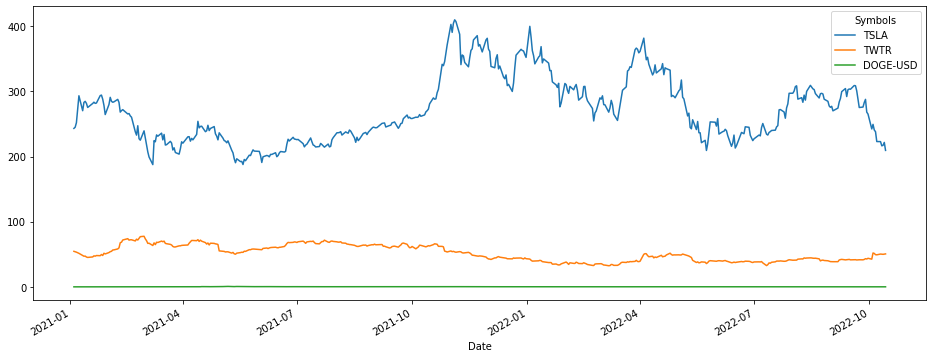

In [10]:
hist.plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

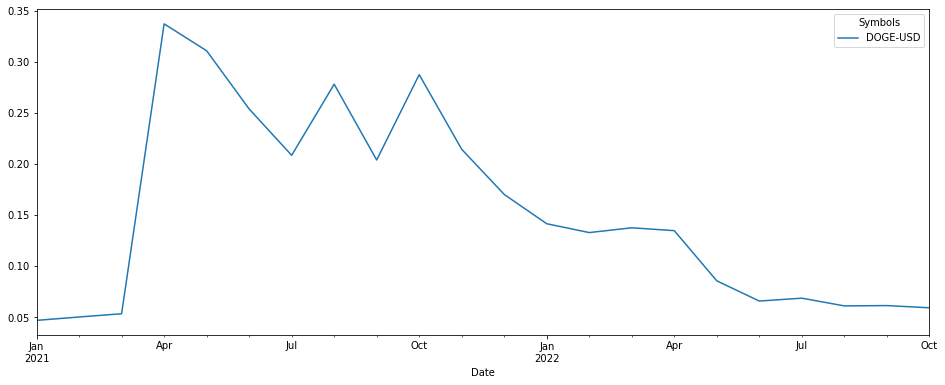

In [11]:
hist[['DOGE-USD']].resample('m').last().plot(figsize = (16,6))

In [12]:
doge_close = yf.Ticker('DOGE-USD').history(period='1y', interval='1d')[['Close']]

In [13]:
a = new.resample('m').last()

In [14]:
b = hist.resample('m').last()

In [23]:
df = pd.concat([a,b], axis=1).dropna()

<AxesSubplot:xlabel='positive', ylabel='TSLA'>

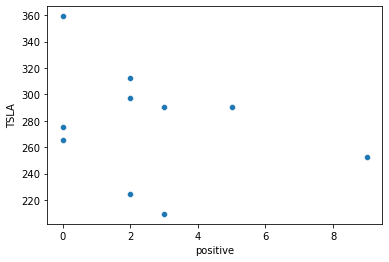

In [29]:
sb.scatterplot(x='positive', y='TSLA', data=df)

In [28]:
df

,positive,neutral,negative,sentiment_total,TSLA,TWTR,DOGE-USD
2022-01-31,2.0,3.0,0.0,5.0,312.239990,37.509998,0.141805
2022-02-28,5.0,3.0,0.0,8.0,290.143341,35.549999,0.133156
2022-03-31,0.0,1.0,1.0,2.0,359.200012,38.689999,0.137826
2022-04-30,3.0,12.0,5.0,20.0,290.253326,49.020000,0.135027
2022-05-31,9.0,9.0,3.0,21.0,252.753326,39.599998,0.085865
2022-06-30,2.0,8.0,2.0,12.0,224.473328,37.389999,0.066086
2022-07-31,2.0,8.0,0.0,10.0,297.149994,41.610001,0.068909
2022-08-31,0.0,5.0,0.0,5.0,275.609985,38.750000,0.061330
2022-09-30,0.0,2.0,0.0,2.0,265.250000,43.840000,0.061653
2022-10-31,3.0,21.0,0.0,24.0,209.500000,50.570000,0.059494


In [30]:
pt

,date,negative,neutral,positive,total,date_,negative_ts,neutral_ts,positive_ts,counts_new,date_new_tw,negative_tw,neutral_tw,positive_tw,counts_new_tw
0,3/4/22,5.0,10.0,3.0,18.0,8/4/22,2.0,10.0,8.0,20.0,2/3/22,0,0,0,0
1,4/4/22,1.0,2.0,2.0,5.0,9/4/22,8.0,24.0,8.0,40.0,3/3/22,0,0,0,0
2,5/4/22,3.0,3.0,4.0,10.0,11/4/22,0.0,0.0,0.0,0.0,4/3/22,0,0,0,0
3,6/4/22,0.0,5.0,2.0,7.0,12/4/22,0.0,0.0,0.0,0.0,5/3/22,0,0,0,0
4,7/4/22,0.0,9.0,1.0,10.0,13/4/22,0.0,0.0,0.0,0.0,7/3/22,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/9/22,0,21,3,24
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/9/22,6,12,6,24
162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/9/22,8,34,10,52
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/9/22,0,8,2,10


In [57]:
date = pt[['date' ,'negative', 'neutral', 'positive', 'total']].dropna()
date.set_index('date', inplace=True)
date.index = pd.DatetimeIndex(date.index)

date_ = pt[['date_', 'negative_ts', 'neutral_ts', 'positive_ts', 'counts_new']].dropna()
date_.columns = ['date', 'negative', 'neutral', 'positive', 'total']
date_.set_index('date', inplace=True)
date_.index = pd.DatetimeIndex(date_.index)

date_n = pt[['date_new_tw', 'negative_tw', 'neutral_tw', 'positive_tw', 'counts_new_tw']].dropna()
date_n.columns = ['date', 'negative', 'neutral', 'positive', 'total']
date_n.set_index('date', inplace=True)
date_n.index = pd.DatetimeIndex(date_n.index)

In [58]:
pl = pd.concat([date, date_, date_n])

In [50]:
pl.figure.savefig('sentiment_graph.jpeg')

<AxesSubplot:xlabel='date'>

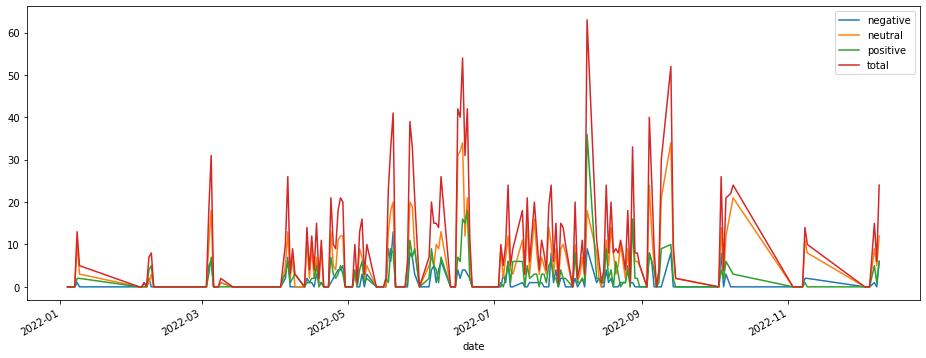

In [59]:
pl.plot(figsize = (16,6), axis=1)

In [60]:
pl

,negative,neutral,positive,total
date,,,,
2022-03-04,5.0,10.0,3.0,18.0
2022-04-04,1.0,2.0,2.0,5.0
2022-05-04,3.0,3.0,4.0,10.0
2022-06-04,0.0,5.0,2.0,7.0
2022-07-04,0.0,9.0,1.0,10.0
...,...,...,...,...
2022-10-09,0.0,21.0,3.0,24.0
2022-12-09,6.0,12.0,6.0,24.0
2022-09-13,8.0,34.0,10.0,52.0


In [61]:
date

,negative,neutral,positive,total
date,,,,
2022-03-04,5.0,10.0,3.0,18.0
2022-04-04,1.0,2.0,2.0,5.0
2022-05-04,3.0,3.0,4.0,10.0
2022-06-04,0.0,5.0,2.0,7.0
2022-07-04,0.0,9.0,1.0,10.0
...,...,...,...,...
2022-11-09,2.0,8.0,0.0,10.0
2022-12-09,6.0,12.0,6.0,24.0
2022-09-13,8.0,34.0,10.0,52.0


<AxesSubplot:>

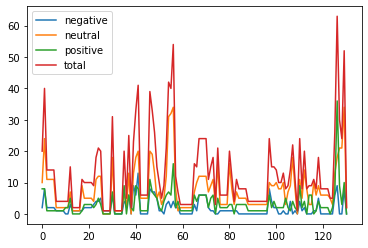

In [63]:
date.merge(date_).plot()

In [64]:
date_

,negative,neutral,positive,total
date,,,,
2022-08-04,2.0,10.0,8.0,20.0
2022-09-04,8.0,24.0,8.0,40.0
2022-11-04,0.0,0.0,0.0,0.0
2022-12-04,0.0,0.0,0.0,0.0
2022-04-13,0.0,0.0,0.0,0.0
...,...,...,...,...
2022-10-09,0.0,21.0,3.0,24.0
2022-12-09,6.0,12.0,6.0,24.0
2022-09-13,8.0,34.0,10.0,52.0


In [65]:
date

,negative,neutral,positive,total
date,,,,
2022-03-04,5.0,10.0,3.0,18.0
2022-04-04,1.0,2.0,2.0,5.0
2022-05-04,3.0,3.0,4.0,10.0
2022-06-04,0.0,5.0,2.0,7.0
2022-07-04,0.0,9.0,1.0,10.0
...,...,...,...,...
2022-11-09,2.0,8.0,0.0,10.0
2022-12-09,6.0,12.0,6.0,24.0
2022-09-13,8.0,34.0,10.0,52.0


In [66]:
date_n

,negative,neutral,positive,total
date,,,,
2022-02-03,0,0,0,0
2022-03-03,0,0,0,0
2022-04-03,0,0,0,0
2022-05-03,0,0,0,0
2022-07-03,0,0,0,0
...,...,...,...,...
2022-10-09,0,21,3,24
2022-12-09,6,12,6,24
2022-09-13,8,34,10,52


In [148]:
corr = pd.concat([x, ts], axis = 1).dropna()

In [127]:
hist = yf.Tickers('TSLA TWTR DOGE-USD').history(period='5y' ,inteval='1d')[['Close']]
hist.columns = ['TSLA', 'TWTR', 'Doge']

[*********************100%***********************]  3 of 3 completed


In [130]:
ts = hist.resample('m').last()

In [119]:
x = date_n.resample('m').last()

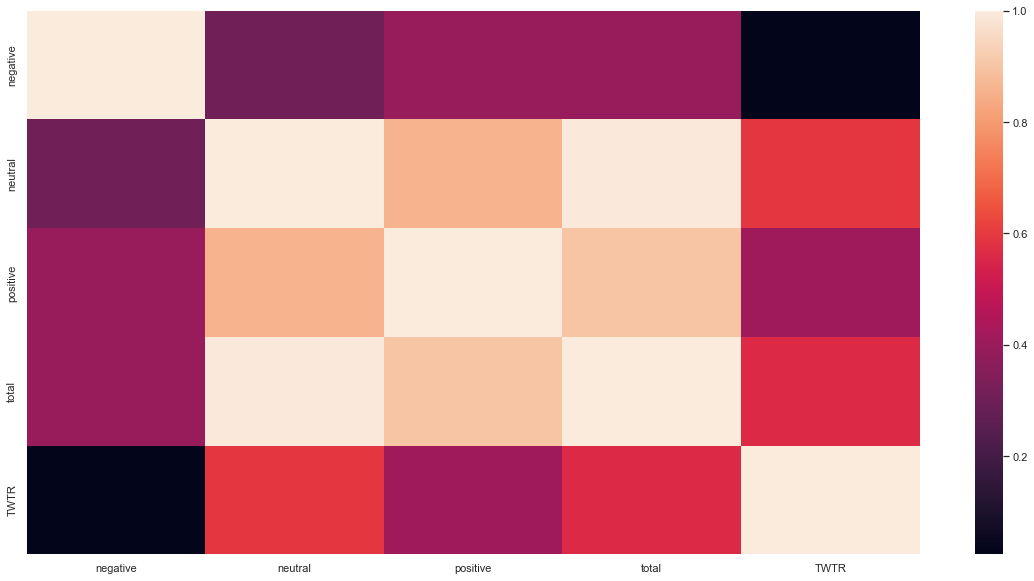

In [111]:
sb.set(rc={"figure.figsize":(20, 10)})
heat = sb.heatmap(corr)

In [112]:
heat.figure.savefig('twtr_sentiment_corr_heatmap.jpeg')

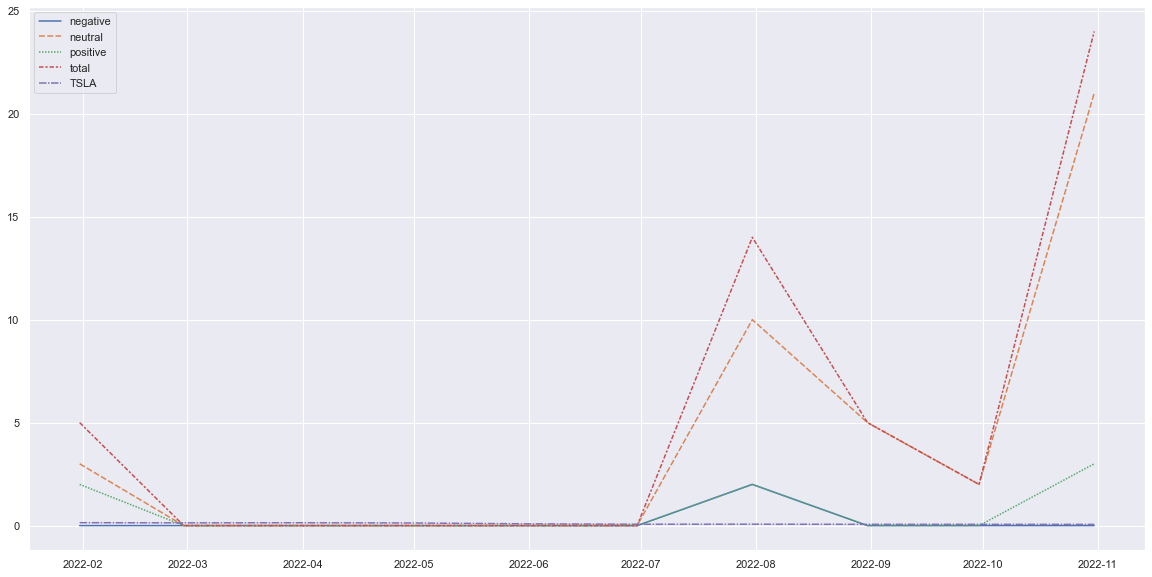

In [145]:
y = sb.lineplot(data=corr)

In [146]:
y.figure.savefig('twtr_sentiment_lineplot.jpeg')

In [134]:
ts

,TSLA,TWTR,Doge
Date,,,
2017-10-31,NaN,22.101999,20.620001
2017-11-30,0.002079,20.590000,20.580000
2017-12-31,0.008972,20.756666,24.010000
2018-01-31,0.006010,23.620667,25.809999
2018-02-28,0.006018,22.870667,31.860001
...,...,...,...
2022-06-30,0.066086,224.473328,37.389999
2022-07-31,0.068272,297.149994,41.610001
2022-08-31,0.061330,275.609985,38.750000


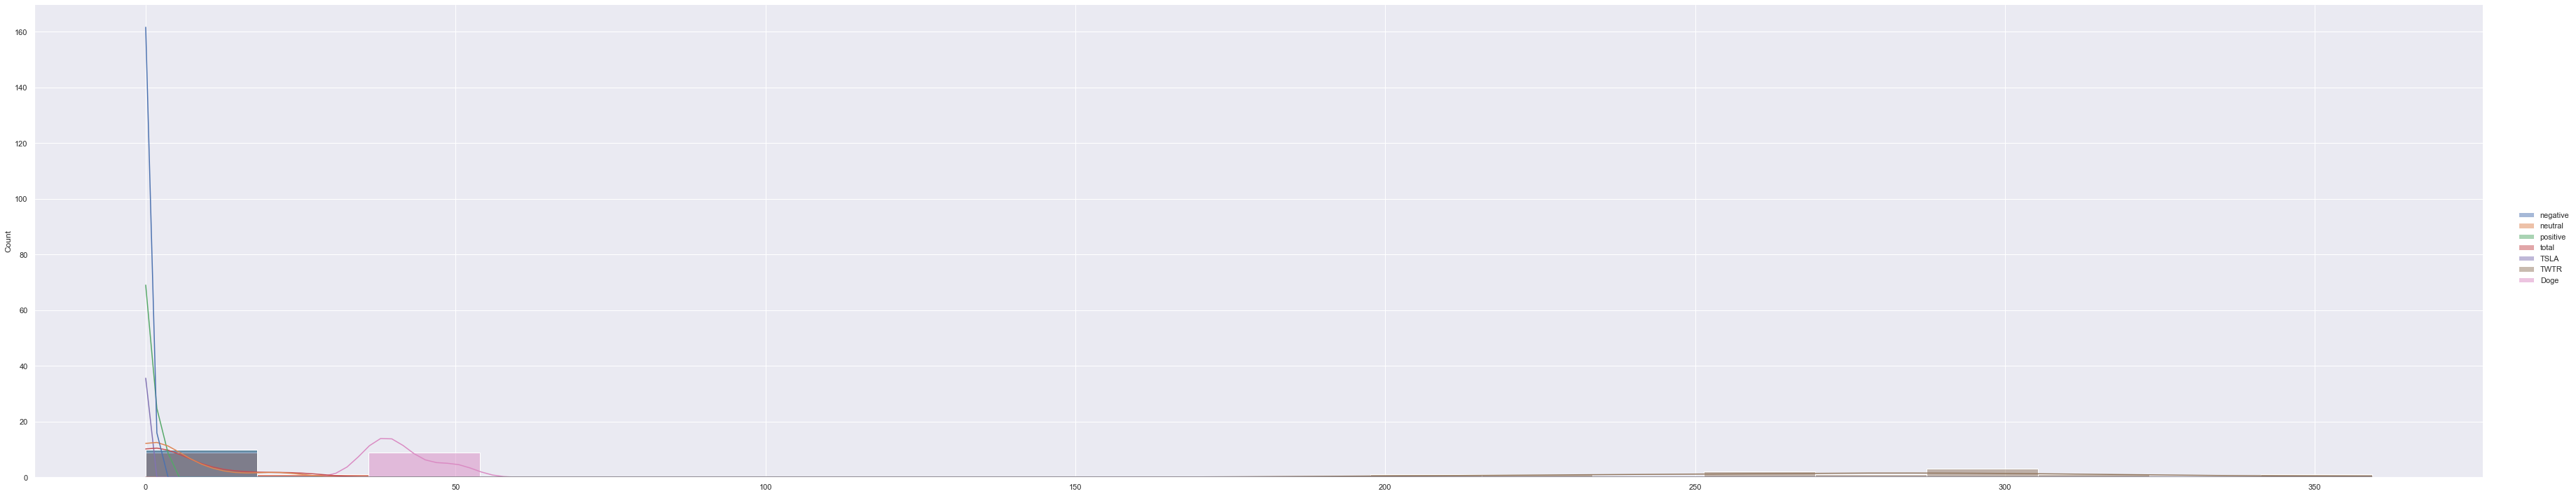

In [173]:
sb.set(rc={"figure.figsize":(30, 20)})
f = sb.displot(corr, kde=True, height =10, aspect=5)

In [164]:
f.figure.savefig('sentiment_pairplot_scatter.jpeg')